In [58]:
# Necessary dependencies:
# Pandas, Numpy, Spacy

import pandas as pd 
import numpy
import matplotlib.pyplot as plt

# Clean clean clean 

emissions = pd.read_csv('shared_data_read_only/Agriculture Dataset.csv')
emissions.drop( emissions.index[emissions['Year'] != 2017], inplace=True )

emissions = emissions.iloc[: , 4:]
emissions.drop( columns=['Population','Temperature change °C', 'Standard Deviation °C', 'Farm-gate emissions - Emissions (CO2eq) (AR5) - kilotonnes', 'Food Transport - Emissions (CO2eq) (AR5) - kilotonnes', 'Waste - Emissions (CO2eq) (AR5) - kilotonnes'],  inplace=True )

emissions.drop(list(emissions.filter(regex = 'intensity')), axis = 1, inplace = True)
emissions.drop(list(emissions.filter(regex = 'Production')), axis = 1, inplace = True)
emissions = emissions.dropna()

# print(emissions)
# make a df of emissions / population

In [64]:
ecol = []
ref = emissions['GDP  (2015 US$, mil)']

for i in range ( len (emissions) - 1):
    ecol.append ( emissions.iloc[:, i] / ref )

means = dict()
ecoln = list(emissions.columns.values.tolist())

emissions[1:]

for j in range ( 1, len (emissions) - 1):
    str = ecoln[j]
    means[ str[0:len(str)-29] ] = ( ecol[j].mean() ) 

dict(sorted(means.items(), key=lambda item: item[1]))




print(means)

{'Cereals excluding rice': 0.010917251692869862, 'Eggs, hen, in shell': 0.001411083413110091, 'Meat, buffalo': 0.011491081470689456, 'Meat, cattle': 0.0715956264121756, 'Meat, chicken': 0.0016308827104138642, 'Meat, goat': 0.014153664229934991, 'Meat, pig': 0.0034103467033482853, 'Meat, sheep': 0.011380078093167911, 'Milk, whole fresh buffalo': 0.00595727458745837, 'Milk, whole fresh camel': 0.0013974681446370582, 'Milk, whole fresh cow': 0.033292697869498705, 'Milk, whole fresh goat': 0.005083867524098972, 'Milk, whole fresh sheep': 0.00390807455604298, 'Rice, paddy': 0.025205580219662217}


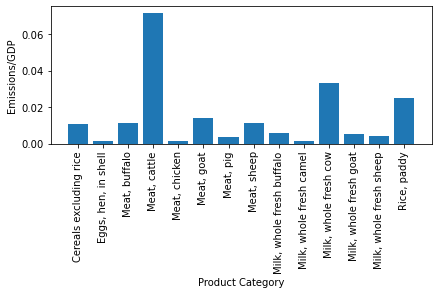

In [70]:
# make data:

names = list( means.keys() )
values = list( means.values() )

plt.bar(range(len(means)), values, tick_label=names)

plt.xticks(range(len(means.values())), means.keys(), rotation=90)
plt.tight_layout()
plt.xlabel('Product Category')
plt.ylabel('Emissions/GDP')

plt.show()